Task-1
1.Load data

In [1]:
#Part-A Task-1: EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("STUDENTS_RAW_DATA.csv") 

In [2]:
print("Dataset Size")
df.shape

Dataset Size


(205, 16)

In [3]:
print("First 5 Rows")
df.head()

First 5 Rows


,student_id,age,gender,city,course_stream,study_hours_per_week,attendance_rate,prior_gpa_10pt,has_internet,device_type,parental_education,test_score,admission_date,fee_paid_inr,scholarship,comments
0,S0001,24,Female,Mumbai,MCA,11.2,46.2,6.88,Unknown,NaN,PhD,58.4,11-08-2023,63952,Partial,
1,S0002,21,,Mumbai,BBA,14.9,64.3,5.87,N,Mobile,NaN,85.8,2023-04-29,62085,Yes,Late enrollment
2,S0003,24,Female,Bengaluru,NaN,13.4,57.7,10.29,N,Tablet,NaN,89.3,29/08/2023,55598,Yes,Transferred from another program
3,S0004,28,FEMALE,Remote,ME,8.9,64.6,7.27,N,Laptop,Undergrad,59.4,02-02-2024,54627,Partial,Good coder
4,S0005,21,Male,Bengaluru,EE,11.0,52.2,7.22,Unknown,Desktop,PhD,55.5,01-15-2024,NaN,No,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   student_id            205 non-null    object 
 1   age                   205 non-null    int64  
 2   gender                201 non-null    object 
 3   city                  201 non-null    object 
 4   course_stream         161 non-null    object 
 5   study_hours_per_week  201 non-null    float64
 6   attendance_rate       205 non-null    float64
 7   prior_gpa_10pt        202 non-null    float64
 8   has_internet          201 non-null    object 
 9   device_type           171 non-null    object 
 10  parental_education    159 non-null    object 
 11  test_score            203 non-null    float64
 12  admission_date        205 non-null    object 
 13  fee_paid_inr          198 non-null    object 
 14  scholarship           154 non-null    object 
 15  comments              1

2. Quick Numerical & Categorical Summary

In [5]:
#identifying numerical and categorical columns
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns
num_cols
cat_cols

Index(['student_id', 'gender', 'city', 'course_stream', 'has_internet',
       'device_type', 'parental_education', 'admission_date', 'fee_paid_inr',
       'scholarship', 'comments'],
      dtype='object')

In [6]:
#numerical summary
df.describe()

,age,study_hours_per_week,attendance_rate,prior_gpa_10pt,test_score
count,205.000000,201.000000,205.000000,202.000000,203.000000
mean,23.204878,12.361692,74.586341,7.299455,71.091133
std,12.387809,7.019279,16.906314,1.328183,17.879490
min,-1.000000,-3.000000,45.300000,4.020000,-5.000000
25%,19.000000,8.900000,59.800000,6.510000,60.000000
50%,22.000000,11.900000,74.900000,7.195000,71.000000
75%,24.000000,15.300000,89.500000,7.957500,81.150000
max,120.000000,60.000000,104.400000,11.500000,133.000000


In [7]:
#quick categorical summary
df.describe(include='object')

,student_id,gender,city,course_stream,has_internet,device_type,parental_education,admission_date,fee_paid_inr,scholarship,comments
count,205,201,201,161,201,171,159,205,198,154,166
unique,200,9,24,8,7,5,5,195,193,3,6
top,S0005,Female,Mumbai,MCA,Y,Mobile,Postgrad,"May 01, 2025",59487,Partial,Transferred from another program
freq,2,32,21,27,35,45,38,3,2,56,33


3. Missingness and Uniqueness

In [8]:
# Missing value count
df.isnull().sum()

student_id               0
age                      0
gender                   4
city                     4
course_stream           44
study_hours_per_week     4
attendance_rate          0
prior_gpa_10pt           3
has_internet             4
device_type             34
parental_education      46
test_score               2
admission_date           0
fee_paid_inr             7
scholarship             51
comments                39
dtype: int64

In [9]:
#unique value count
df.nunique()

student_id              200
age                      19
gender                    9
city                     24
course_stream             8
study_hours_per_week    125
attendance_rate         177
prior_gpa_10pt          146
has_internet              7
device_type               5
parental_education        5
test_score              163
admission_date          195
fee_paid_inr            193
scholarship               3
comments                  6
dtype: int64

4. Value counts for key categorical fields

In [10]:
#Value counts for key categorical fields
df['gender'].value_counts(dropna=False)

gender
Female               32
M                    30
                     26
male                 21
F                    20
FEMALE               19
Male                 19
Prefer not to say    17
Other                17
NaN                   4
Name: count, dtype: int64

In [11]:
df['course_stream'].value_counts(dropna=False)


course_stream
NaN    44
MCA    27
BSc    27
EE     25
BBA    19
ME     19
CS     18
ECE    14
MBA    12
Name: count, dtype: int64

In [12]:
df['scholarship'].value_counts(dropna=False)


scholarship
Partial    56
Yes        51
NaN        51
No         47
Name: count, dtype: int64

5. Quick Plot-1 (Histplot)

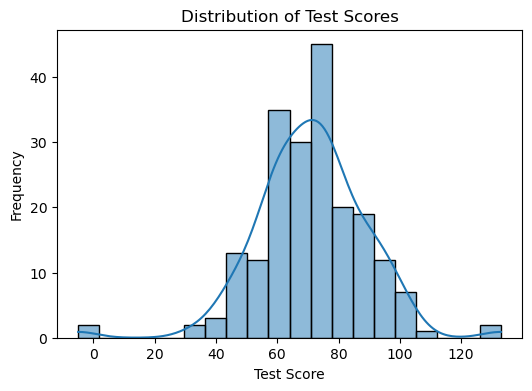

Interpretation: The test scores are roughly normally distributed, but the presence of extreme and negative values indicates data quality issues and potential outliers that require cleaning


In [13]:
#Distribution of Test Scores (Plot-1)
plt.figure(figsize=(6,4))
sns.histplot(df['test_score'], kde=True)
plt.title("Distribution of Test Scores")
plt.xlabel("Test Score")
plt.ylabel("Frequency")
plt.show()
print("Interpretation: The test scores are roughly normally distributed, but the presence of extreme and negative values indicates data quality issues and potential outliers that require cleaning")

Plot-2 (Countplot)

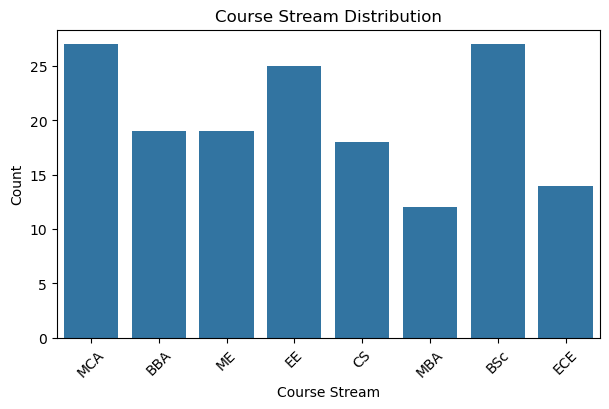

Interpretation: The dataset shows an uneven distribution across course streams, with MCA being the most common program, indicating class imbalance among academic programs.


In [14]:
#Course Stream Distribution (Plot-2)
#The dataset shows an uneven distribution across course streams, with MCA being the most common program, indicating class imbalance among academic programs.
plt.figure(figsize=(7,4))
sns.countplot(x='course_stream', data=df)
plt.title("Course Stream Distribution")
plt.xlabel("Course Stream")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()
print("Interpretation: The dataset shows an uneven distribution across course streams, with MCA being the most common program, indicating class imbalance among academic programs.")

Plot-3 (Histplot)

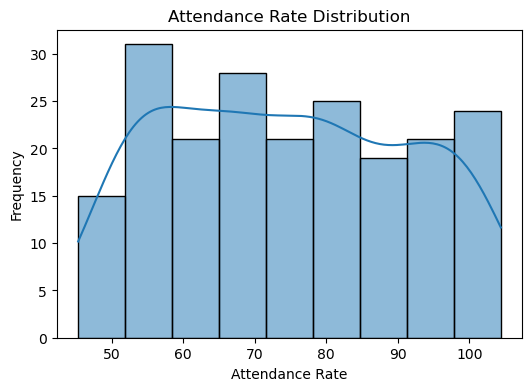

Interpretation: Attendance rates are widely distributed, with most students clustered around mid to high values. The presence of unusually high values suggests potential data entry errors or outliers that may require validation.


In [15]:
#Attendance Rate Distribution (Plot-3) 
plt.figure(figsize=(6,4))
sns.histplot(df['attendance_rate'], kde=True)
plt.title("Attendance Rate Distribution")
plt.xlabel("Attendance Rate")
plt.ylabel("Frequency")
plt.show()
print("Interpretation: Attendance rates are widely distributed, with most students clustered around mid to high values. The presence of unusually high values suggests potential data entry errors or outliers that may require validation.")

6. Short EDA Summary

In [16]:
eda_summary_text = """
Short EDA Summary:

    1. Dataset Overview
        - The dataset contains 205 student records with 16 features.
        - The data includes a mix of numeric variables (age, GPA, attendance, test scores) and categorical variables (gender, city, course stream, scholarship).

    2. Numeric Data Summary
        - Numeric variables show wide variability, particularly in age, study hours per week, and test scores.
        - Invalid values such as negative test scores, negative study hours, and extreme ages were observed.
        - GPA and attendance rates show reasonable central tendencies but include outliers.
        
    3. Categorical Data Summary
        - Several categorical columns contain missing values, including course stream, parental education, device type, and scholarship.
        - Inconsistent text formatting was observed in columns such as gender and course_stream.
        - Some categorical variables exhibit class imbalance, with certain categories dominating.
        
    4. Missing Value Analysis
        - Missing values are present across multiple columns, with the highest missingness in scholarship, parental_education, and course_stream.
        - Placeholder values such as blank strings and “Unknown” contributed to missing data.
        
    5. Value Counts Analysis
        - Gender distribution revealed inconsistent category labels due to casing differences.
        - Course stream distribution showed MCA as the most frequent program.
        - Scholarship status was unevenly distributed, with “Partial” being the most common category.

    6. Visualization Insights
        - Test Score Distribution: The histogram shows a roughly normal distribution with extreme and invalid values, indicating data quality issues.
        - Attendance Rate Distribution: Attendance values are widely spread, with some exceeding realistic limits.
        - Course Stream Distribution: The bar plot highlights imbalance among academic programs.

    7. the EDA identified missing data, inconsistencies, outliers, and formatting issues, justifying the need for systematic data cleaning and preprocessing.
"""

Task-2 Data Cleaning & Preprocessing

In [17]:
#Part-B Task-2: Data Cleaning & Preprocessing
import pandas as pd
import numpy as np

df = pd.read_csv("STUDENTS_RAW_DATA.csv")
print("Dataset shape (rows, columns):", df.shape)
print("\nPreview of data:")
df.head()


Dataset shape (rows, columns): (205, 16)

Preview of data:


,student_id,age,gender,city,course_stream,study_hours_per_week,attendance_rate,prior_gpa_10pt,has_internet,device_type,parental_education,test_score,admission_date,fee_paid_inr,scholarship,comments
0,S0001,24,Female,Mumbai,MCA,11.2,46.2,6.88,Unknown,NaN,PhD,58.4,11-08-2023,63952,Partial,
1,S0002,21,,Mumbai,BBA,14.9,64.3,5.87,N,Mobile,NaN,85.8,2023-04-29,62085,Yes,Late enrollment
2,S0003,24,Female,Bengaluru,NaN,13.4,57.7,10.29,N,Tablet,NaN,89.3,29/08/2023,55598,Yes,Transferred from another program
3,S0004,28,FEMALE,Remote,ME,8.9,64.6,7.27,N,Laptop,Undergrad,59.4,02-02-2024,54627,Partial,Good coder
4,S0005,21,Male,Bengaluru,EE,11.0,52.2,7.22,Unknown,Desktop,PhD,55.5,01-15-2024,NaN,No,NaN


1. Standardize Placeholder Missing Indicators

In [18]:
#Standardize Placeholder Missing Indicators
placeholders = ["", " ", "NA", "N/A", "null", "NULL", "Unknown", "unknown"]
df.replace(placeholders, np.nan, inplace=True)

print("\n Placeholder missing indicators standardized to NaN.")
print(df.isnull().sum())


 Placeholder missing indicators standardized to NaN.
student_id               0
age                      0
gender                  30
city                     4
course_stream           44
study_hours_per_week     4
attendance_rate          0
prior_gpa_10pt           3
has_internet            27
device_type             34
parental_education      73
test_score               2
admission_date           0
fee_paid_inr             7
scholarship             51
comments                70
dtype: int64


2. Trim Whitespace & Normalize Text Columns

In [19]:
#Trim Whitespace & Normalize Text Columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

df['gender'] = df['gender'].str.title()
df['city'] = df['city'].str.title()
df['course_stream'] = df['course_stream'].str.upper()

print("\n Whitespace removed and text columns normalized.")


 Whitespace removed and text columns normalized.


3. Parse Dates

In [20]:
#Parse Dates
df['admission_date'] = pd.to_datetime(
    df['admission_date'],
    errors='coerce',
    dayfirst=True
)

print("\n Admission dates parsed.")
print("Invalid dates converted to NaT:", df['admission_date'].isnull().sum())



 Admission dates parsed.
Invalid dates converted to NaT: 177


4. Coerce Numeric Columns

In [21]:
#Coerce Numeric Columns (Currency & Garbage)
df['fee_paid_inr'] = (
    df['fee_paid_inr']
    .astype(str)
    .str.replace(r"[^\d.]", "", regex=True)
)

df['fee_paid_inr'] = pd.to_numeric(df['fee_paid_inr'], errors='coerce')

print("\n fee_paid_inr cleaned and converted to numeric.")


 fee_paid_inr cleaned and converted to numeric.


5. Standardize categorical values

In [22]:
#Standardize categorical values 
#Gender
if "gender" in df.columns:
    def clean_gender(x):
        if pd.isna(x) or str(x).strip() == "":
            return "Unknown"
        s = str(x).strip().lower()
        if s in {"m", "male", "man", "mr"}:
            return "Male"
        if s in {"f", "female", "woman", "ms", "mrs"}:
            return "Female"
        if s in {"prefer not to say", "prefer not to answer", "prefer_not_to_say","other","non-binary","nb"}:
            return "Unknown"
        return s.title()

    df["gender"] = df["gender"].apply(clean_gender)


#Internet Access
if "has_internet" in df.columns:
    def clean_net(x):
        if pd.isna(x):
            return np.nan
        s = str(x).strip().lower()
        if s in {"y", "yes", "true", "1", "available", "yep", "yeah"}:
            return "Yes"
        if s in {"n", "no", "false", "0", "not available", "nope"}:
            return "No"
        return "Unknown"

    df["has_internet"] = df["has_internet"].apply(clean_net)


#Device Type
if "device_type" in df.columns:
    def clean_device(x):
        if pd.isna(x):
            return np.nan
        s = str(x).strip().lower()
        if "lap" in s or "notebook" in s:
            return "Laptop"
        if any(k in s for k in ["phone", "mobile", "cell"]):
            return "Mobile"
        if "desk" in s or s in {"pc", "desktop"}:
            return "Desktop"
        if "tab" in s:
            return "Tablet"
        if s in {"none", "na", "n/a", "null"}:
            return "None"
        return s.title()

    df["device_type"] = df["device_type"].apply(clean_device)


#Scholarship
if "scholarship" in df.columns:
    def clean_scholarship(x):
        if pd.isna(x):
            return np.nan
        s = str(x).strip().lower()
        if s in {"y", "yes", "true"}:
            return "Yes"
        if s in {"n", "no", "false"}:
            return "No"
        if "part" in s:
            return "Partial"
        return s.title()

    df["scholarship"] = df["scholarship"].apply(clean_scholarship)


#City
if "city" in df.columns:
    df["city"] = df["city"].str.title()


#Other categorical columns
for col in ["course_stream", "parental_education"]:
    if col in df.columns:
        df[col] = df[col].str.strip().str.title()

#Fill remaining categorical missing values
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].fillna("None")

#Final formatting
if "course_stream" in df.columns:
    df["course_stream"] = df["course_stream"].str.upper()

print("Categorical values standardized to clean and readable forms.")

Categorical values standardized to clean and readable forms.


6. Remove Exact & Student-Level Duplicates

In [23]:
#Remove Exact & Student-Level Duplicates
#Exact duplicates
before = len(df)
df = df.drop_duplicates(keep="first")
removed_exact = before - len(df)

print(f"Exact duplicates removed: {removed_exact}")


#Student-level duplicates
removed_student = 0

if "student_id" in df.columns:
    # find any date column
    date_cols = [c for c in df.columns if "date" in c.lower()]

    if date_cols:
        dcol = date_cols[0]
        parsed_dates = pd.to_datetime(df[dcol], errors="coerce", dayfirst=True)

        keep_idx = []
        for sid, idx in df.groupby("student_id").groups.items():
            g = parsed_dates.loc[idx]
            # keep latest record if date exists, else first record
            keep_idx.append(g.idxmax() if g.notna().any() else idx[0])

        before_student = len(df)
        df = (
            df.loc[keep_idx]
            .sort_values("student_id")
            .reset_index(drop=True)
        )

        removed_student = before_student - len(df)
        print(f"Student-level duplicates removed: {removed_student}")

    else:
        before_student = len(df)
        df = (
            df.drop_duplicates(subset="student_id", keep="first")
              .sort_values("student_id")
              .reset_index(drop=True)
        )

        removed_student = before_student - len(df)
        print(f"Student-level duplicates removed: {removed_student}")


print("Final rows:", len(df))
print("Total rows removed:", removed_exact + removed_student)

Exact duplicates removed: 4
Student-level duplicates removed: 1
Final rows: 200
Total rows removed: 5


7. Fix Impossible Values & Outliers Handling

In [24]:
#Fix Impossible Values
df.loc[(df['age'] < 10) | (df['age'] > 100), 'age'] = np.nan
df.loc[(df['attendance_rate'] < 0) | (df['attendance_rate'] > 100), 'attendance_rate'] = np.nan
df.loc[(df['prior_gpa_10pt'] < 0) | (df['prior_gpa_10pt'] > 10), 'prior_gpa_10pt'] = np.nan
df.loc[df['test_score'] < 0 | (df['test_score'] > 100 ), 'test_score'] = np.nan

#Business rule: Age > 17 must be a degree program
degree_programs = {
    "BTECH", "BSC", "BA", "BCOM", "BBA",
    "MTECH", "MSC", "MA", "MCOM", "MBA",
    "MCA", "ME", "MS", "PHD"
}

# Ensure standardized format
df["course_stream"] = df["course_stream"].astype(str).str.strip().str.upper()

invalid_mask = (df["age"] < 17) & (~df["course_stream"].isin(degree_programs))
invalid_count = invalid_mask.sum()

df.loc[invalid_mask, "course_stream"] = np.nan

print("Age < 17 ⇒ non-degree program only")
print(f"Invalid degree course_stream values corrected: {invalid_count}")

Age < 17 ⇒ non-degree program only
Invalid degree course_stream values corrected: 7


In [25]:
#Outliers Handling 
Q1 = df['study_hours_per_week'].quantile(0.25)
Q3 = df['study_hours_per_week'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df.loc[
    (df['study_hours_per_week'] < lower) |
    (df['study_hours_per_week'] > upper),
    'study_hours_per_week'
] = np.nan

print("\n Outliers in study_hours_per_week handled using IQR.")


 Outliers in study_hours_per_week handled using IQR.


9. Imputation

In [26]:
#Imputation
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns

df[num_cols] = df[num_cols].fillna(df[num_cols].median())

for col in cat_cols:
    mode_val = df[col].mode(dropna=True)[0]
    df[col] = df[col].fillna(mode_val)

df.loc[df["age"] < 17, "course_stream"].unique()

print("\n Missing values imputed (median for numeric, mode for categorical).")


 Missing values imputed (median for numeric, mode for categorical).


10. Encoding for Model Readiness

In [27]:
#Encoding for Model Readiness
df_model = df.drop(columns=['student_id', 'comments', 'admission_date'], errors='ignore')

df_model_encoded = pd.get_dummies(
    df_model,
    columns=df_model.select_dtypes(include='object').columns,
    drop_first=False
)
# Convert boolean columns to 0/1
df_model_encoded = df_model_encoded.astype(int)

print("\n One-hot encoding applied.")
print("Model-ready dataset shape:", df_model_encoded.shape)



 One-hot encoding applied.
Model-ready dataset shape: (200, 44)


11. Save Outputs

In [28]:
#Save Outputs
df.to_csv("STUDENTS_CLEANED_DATA.csv", index=False)
df_model_encoded.to_csv("STUDENTS_MODEL_DATA.csv", index=False)

print("\n Files saved successfully.")
print("- STUDENTS_CLEANED_DATA.csv")
print("- STUDENTS_MODEL_DATA.csv")


 Files saved successfully.
- STUDENTS_CLEANED_DATA.csv
- STUDENTS_MODEL_DATA.csv


In [29]:
# Calculate missingness 
missingness = df.isna().mean().sort_values(ascending=False) * 100
top10_missing = missingness.head(10).reset_index()
top10_missing.columns = ["Column", "% Missing"]

print("Final Missingness(10 Columns)")
print(top10_missing.to_string(index=False))

Final Missingness(10 Columns)
              Column  % Missing
          student_id        0.0
                 age        0.0
              gender        0.0
                city        0.0
       course_stream        0.0
study_hours_per_week        0.0
     attendance_rate        0.0
      prior_gpa_10pt        0.0
        has_internet        0.0
         device_type        0.0
